In [53]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [54]:
image = Image.open('D:\\memories\\F-35.jpg')

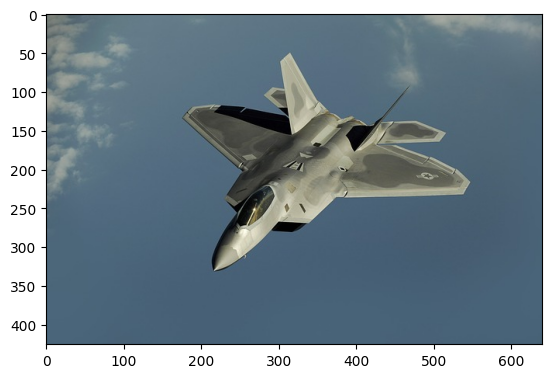

In [55]:
plt.imshow(image)

In [56]:
image_bw = image.convert('L')

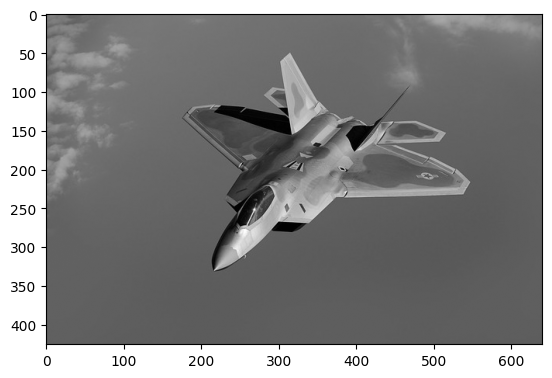

In [57]:
plt.imshow(image_bw, cmap='gray')

In [58]:
arr_image_bw = np.array(image_bw)

In [59]:
arr_image_bw.shape

(426, 640)

In [60]:
def convolve2d(image, kernel, padding=0):
    kernel = np.flipud(np.fliplr(kernel))  # flip for convolution

    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Apply padding
    padded_image = np.pad(image,
                          ((padding, padding), (padding, padding)),
                          mode='constant', constant_values=0)

    # Output dimensions (same as input if padding is set appropriately)
    output_height = image_height
    output_width = image_width
    output = np.zeros((output_height, output_width))

    # Slide kernel over every position of the input
    for y in range(output_height):
        for x in range(output_width):
            # Extract region of image the size of the kernel
            region = padded_image[y:y+kernel_height, x:x+kernel_width]

            # Ensure the region matches kernel size (especially near edges)
            if region.shape == kernel.shape:
                output[y, x] = np.sum(region * kernel)

    return output

In [61]:
def normalize_image(img):
    # Normalize the image to 0–255 range
    img_min = np.min(img)
    img_max = np.max(img)
    norm_img = (img - img_min) / (img_max - img_min) * 255
    return norm_img.astype(np.uint8)

---
## Convolution Operation

**1. Edge Detection Filter**

| Filter                | Detects/Applies            | Appearance             | Use Case                                  |
|-----------------------|-----------------------------|-------------------------|--------------------------------------------|
| Laplacian Edge        | All-direction edges         | Thin edges              | General edge detection                     |
| Box Blur              | Uniform blur                | Soft, flat image        | Denoising (basic)                          |
| Gaussian Blur         | Weighted blur               | Smooth, clean           | Preprocessing before edges                 |
| Emboss                | Directional shading         | 3D-like texture         | Stylizing / artistic effects               |
| Motion Blur           | Directional motion          | Streaking along angle   | Simulate movement, detect motion blur      |
| Roberts Cross         | Diagonal edge detection     | Sharp diagonal edges    | Edge detection in diagonal directions      |
| Sharpen               | Enhances contrast           | Crisp, high detail      | Improve focus, prep for detection          |
| High-Pass Filter      | Fine detail enhancement     | Grainy, textural        | Reveal subtle edges and micro patterns     |
| Artistic Glow         | Soft + bright highlights    | Radiant, glowing look   | Visual effects, style transfer             |
| Edge + Emboss Combo   | Structural + depth          | Stylized relief look    | Artistic edge-enhanced embossing           |
| Texture Enhancer      | Texture & flaw highlighter  | Patchy, noisy patterns  | Detect anomalies or material textures      |

In [131]:
vertical_edge = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

horizontal_edge = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
])

# Detects edges in all directions (horizontal, vertical, and diagonal) by measuring how sharply intensity changes in all directions.
laplacian_edge = np.array([
    [ 0, -1,  0],
    [-1,  4, -1],
    [ 0, -1,  0]
])

simple_edge = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])

**2. Blur/Smoothing filter**

In [63]:
# Box-blue (mean filter)
box_blur = np.ones((3, 3)) / 9

gaussian_blur = (1/16) * np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
])

**3. Sharpening filter**

In [64]:
sharpen = np.array([
    [ 0, -1,  0],
    [-1,  5, -1],
    [ 0, -1,  0]
])

emboss = np.array([
    [-2, -1,  0],
    [-1,  1,  1],
    [ 0,  1,  2]
])

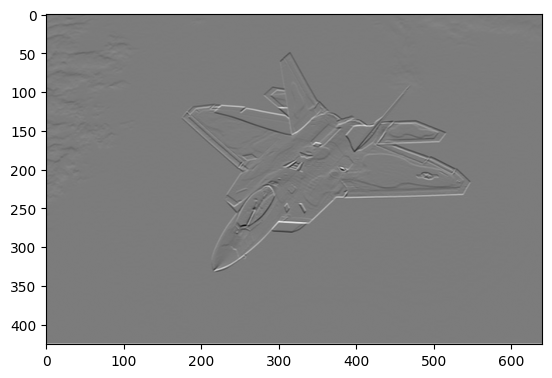

In [65]:
horizontal_edged_img = normalize_image(convolve2d(arr_image_bw, horizontal_edge, 1))
plt.imshow(horizontal_edged_img, cmap='gray')

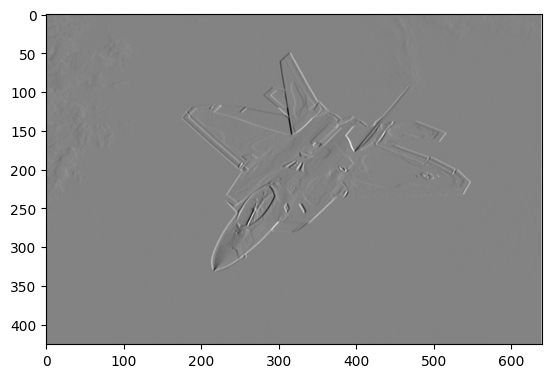

In [66]:
vertical_edged_img = normalize_image(convolve2d(arr_image_bw, vertical_edge, 1))
plt.imshow(vertical_edged_img, cmap='gray')

(np.float64(-0.5), np.float64(639.5), np.float64(425.5), np.float64(-0.5))

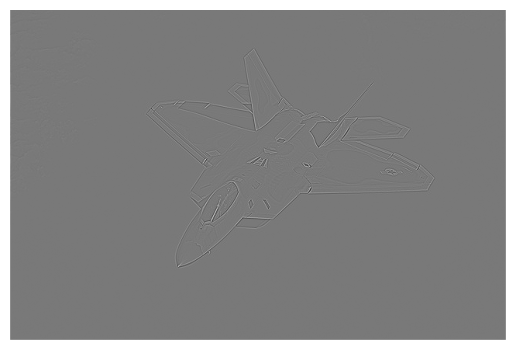

In [67]:
laplacian_img = normalize_image(convolve2d(arr_image_bw, laplacian_edge, 1))
plt.imshow(laplacian_img, cmap='gray')
plt.axis('off')

(np.float64(-0.5), np.float64(639.5), np.float64(425.5), np.float64(-0.5))

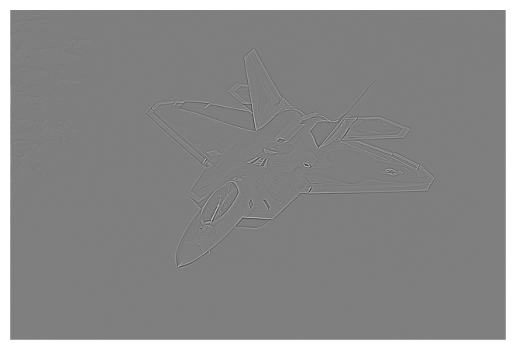

In [68]:
simple_edge_img = normalize_image(convolve2d(arr_image_bw, simple_edge, 1))
plt.imshow(simple_edge_img, cmap='gray')
plt.axis('off')

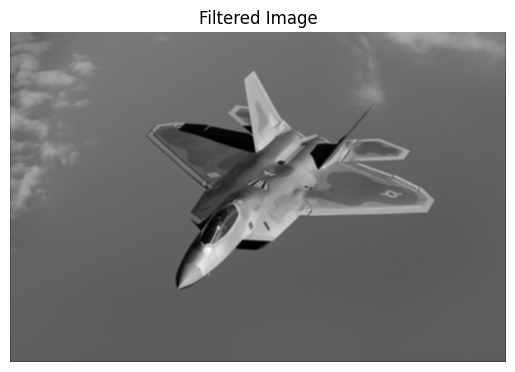

In [100]:
box_blured_img = normalize_image(convolve2d(arr_image_bw, box_blur, padding=1))

plt.imshow(box_blured_img, cmap='gray')
plt.title("Filtered Image")
plt.axis("off")
plt.show()

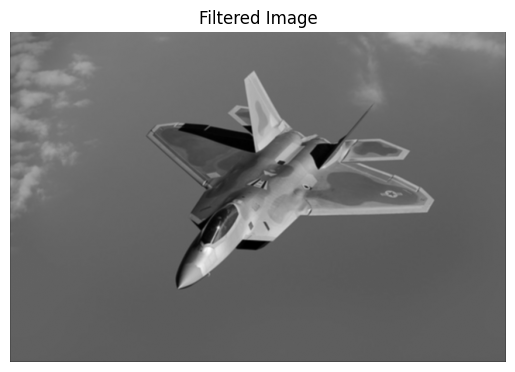

In [101]:
gaussian_blured_image = normalize_image(convolve2d(arr_image_bw, gaussian_blur, padding=1))

plt.imshow(gaussian_blured_image, cmap='gray')
plt.title("Filtered Image")
plt.axis("off")
plt.show()

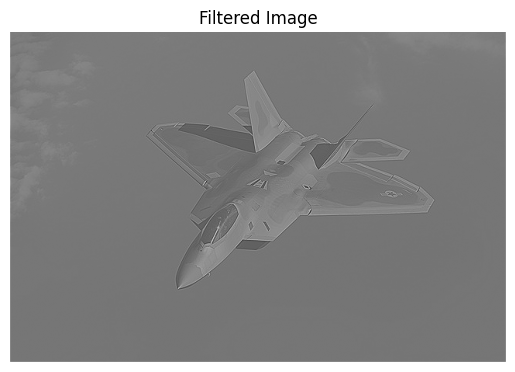

In [102]:
sharpen_image = normalize_image(convolve2d(arr_image_bw, sharpen, padding=1))

plt.imshow(sharpen_image, cmap='gray')
plt.title("Filtered Image")
plt.axis("off")
plt.show()

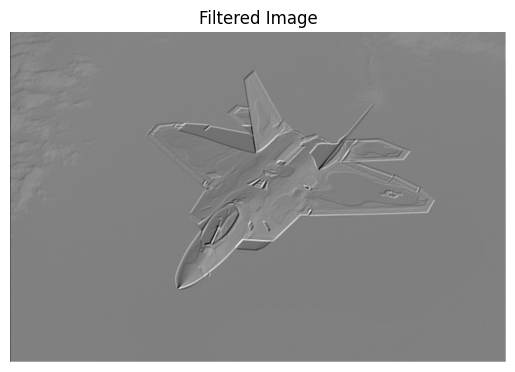

In [103]:
emboss_image = normalize_image(convolve2d(arr_image_bw, emboss, padding=1))

plt.imshow(emboss_image, cmap='gray')
plt.title("Filtered Image")
plt.axis("off")
plt.show()

---
## Playing with threshold

In [135]:
def relu_threshold(image, threshold=100):
    relu_applied = np.maximum(0, image)
    binary_output = np.where(relu_applied > threshold, 255, 0)
    return binary_output.astype(np.uint8)

(np.float64(-0.5), np.float64(639.5), np.float64(425.5), np.float64(-0.5))

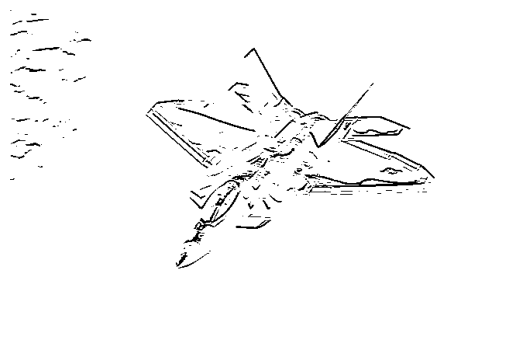

In [136]:
plt.imshow(relu_threshold(horizontal_edged_img,115), cmap='gray')
plt.axis('off')

(np.float64(-0.5), np.float64(639.5), np.float64(425.5), np.float64(-0.5))

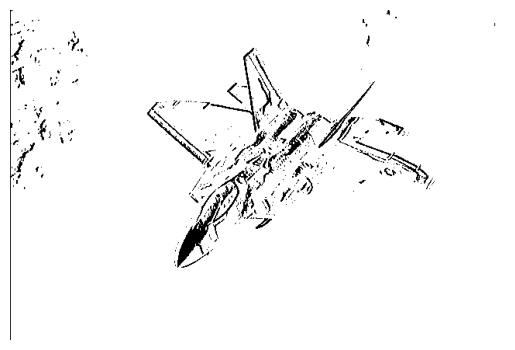

In [137]:
plt.imshow(relu_threshold(vertical_edged_img,126), cmap='gray')
plt.axis('off')

(np.float64(-0.5), np.float64(639.5), np.float64(425.5), np.float64(-0.5))

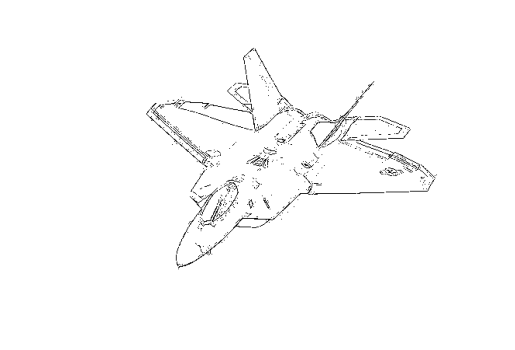

In [138]:
plt.imshow(relu_threshold(laplacian_img,110), cmap='gray')
plt.axis('off')

(np.float64(-0.5), np.float64(639.5), np.float64(425.5), np.float64(-0.5))

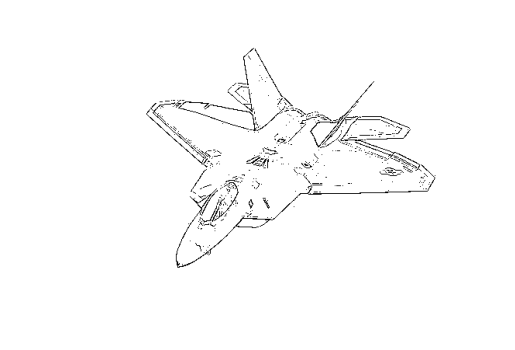

In [139]:
plt.imshow(relu_threshold(simple_edge_img,115), cmap='gray')
plt.axis('off')

(np.float64(-0.5), np.float64(639.5), np.float64(425.5), np.float64(-0.5))

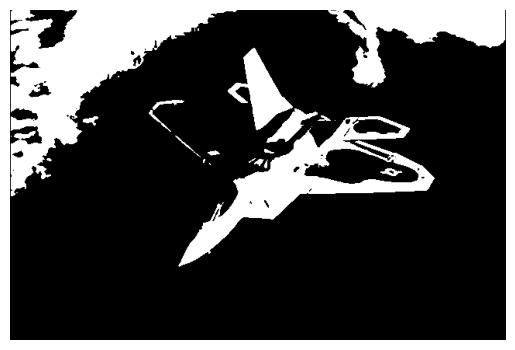

In [140]:
plt.imshow(relu_threshold(box_blured_img,115), cmap='gray')
plt.axis('off')

(np.float64(-0.5), np.float64(639.5), np.float64(425.5), np.float64(-0.5))

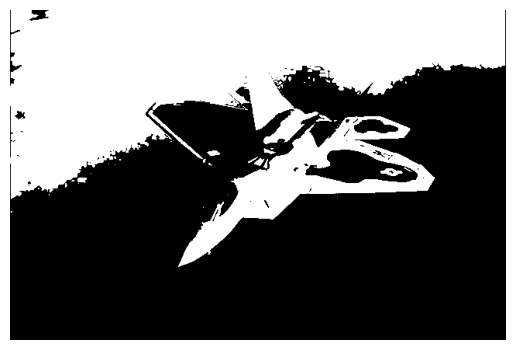

In [141]:
plt.imshow(relu_threshold(gaussian_blured_image,105), cmap='gray')
plt.axis('off')

(np.float64(-0.5), np.float64(639.5), np.float64(425.5), np.float64(-0.5))

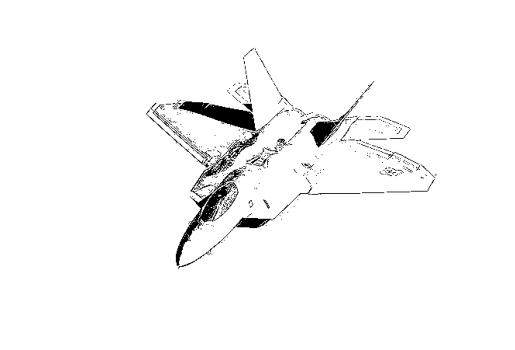

In [142]:
plt.imshow(relu_threshold(sharpen_image,107), cmap='gray')
plt.axis('off')

(np.float64(-0.5), np.float64(639.5), np.float64(425.5), np.float64(-0.5))

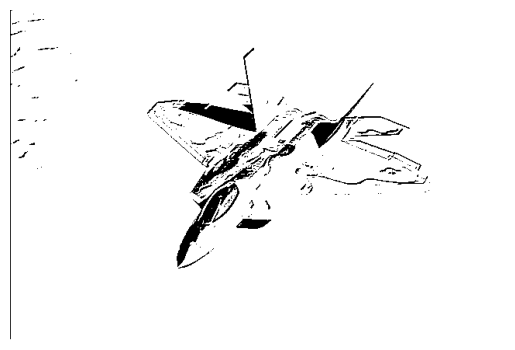

In [143]:
plt.imshow(relu_threshold(emboss_image,120), cmap='gray')
plt.axis('off')

---
## Other filters

In [196]:
# Motion blur filter
motion_blur = (1/9) * np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
])

# Directional edge detector
roberts_cross_x = np.array([
    [1, 0],
    [0, -1]
])

roberts_cross_y = np.array([
    [0, 1],
    [-1, 0]
])

# High-pass filter
high_pass = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])

# Edge enhancement + Emboss mix
combo = convolve2d(arr_image_bw, vertical_edge) + convolve2d(arr_image_bw, emboss)

# Texture emphasis kernel
texture_enhance = np.array([
    [1, -2, 1],
    [-2, 4, -2],
    [1, -2, 1]
])

(np.float64(-0.5), np.float64(639.5), np.float64(425.5), np.float64(-0.5))

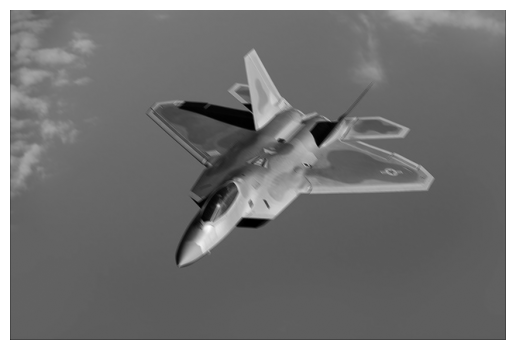

In [148]:
motion_blured = normalize_image(convolve2d(arr_image_bw, motion_blur, 1))
plt.imshow(motion_blured, cmap='gray')
plt.axis('off')

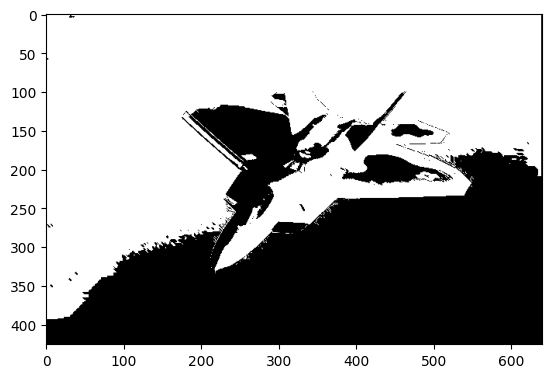

In [154]:
plt.imshow(relu_threshold(motion_blured, 97), cmap='gray')

(np.float64(-0.5), np.float64(639.5), np.float64(425.5), np.float64(-0.5))

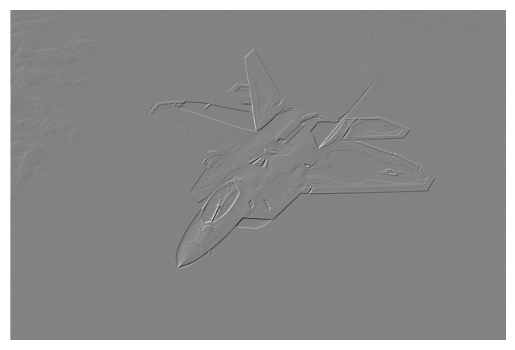

In [163]:
roberts_cross_x_img = normalize_image(convolve2d(arr_image_bw, roberts_cross_x, 1))
plt.imshow(roberts_cross_x_img, cmap='gray')
plt.axis('off')

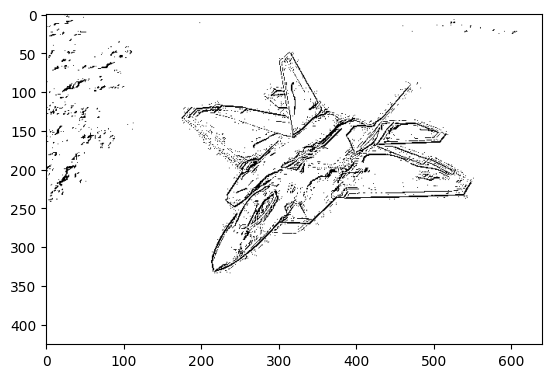

In [164]:
plt.imshow(relu_threshold(roberts_cross_x_img, 127), cmap='gray')

(np.float64(-0.5), np.float64(639.5), np.float64(425.5), np.float64(-0.5))

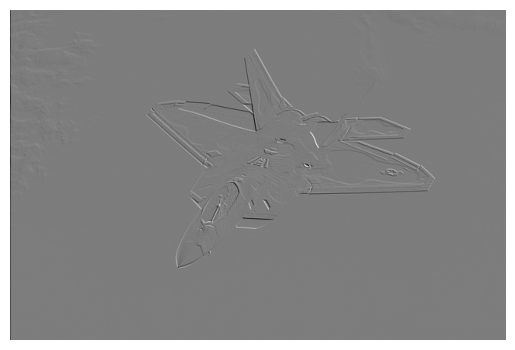

In [165]:
roberts_cross_y_img = normalize_image(convolve2d(arr_image_bw, roberts_cross_y, 1))
plt.imshow(roberts_cross_y_img, cmap='gray')
plt.axis('off')

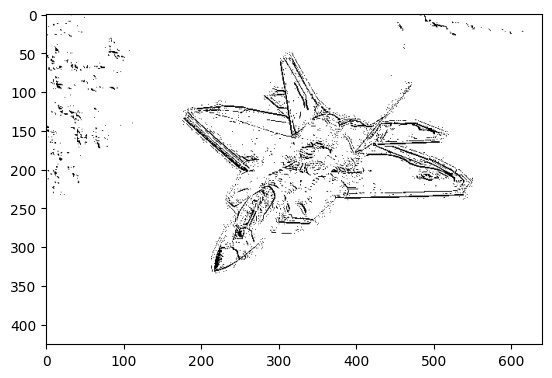

In [170]:
plt.imshow(relu_threshold(roberts_cross_y_img, 120), cmap='gray')

(np.float64(-0.5), np.float64(639.5), np.float64(425.5), np.float64(-0.5))

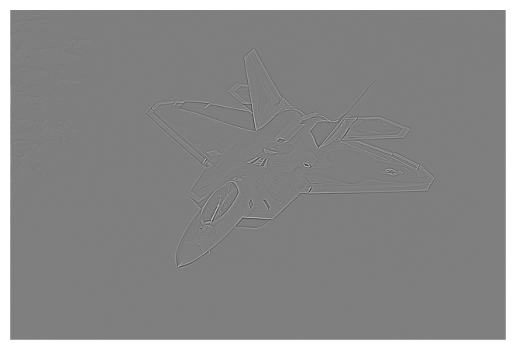

In [171]:
highpass_img = normalize_image(convolve2d(arr_image_bw, high_pass, 1))
plt.imshow(highpass_img, cmap='gray')
plt.axis('off')

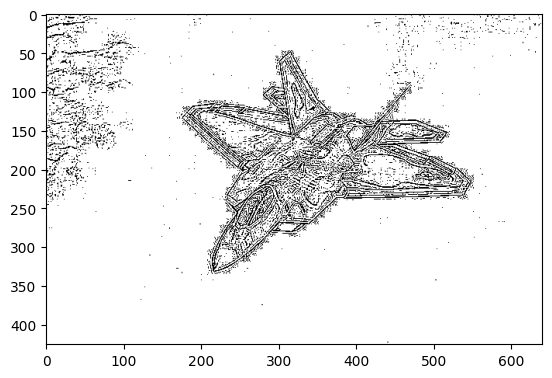

In [176]:
plt.imshow(relu_threshold(highpass_img, 125), cmap='gray')

(np.float64(-0.5), np.float64(639.5), np.float64(425.5), np.float64(-0.5))

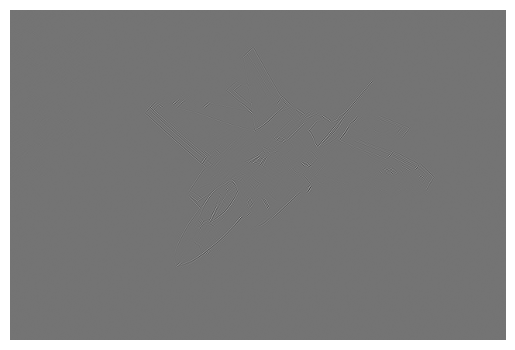

In [184]:
texture_img = normalize_image(convolve2d(arr_image_bw, texture_enhance, 0))
plt.imshow(texture_img, cmap='gray')
plt.axis('off')

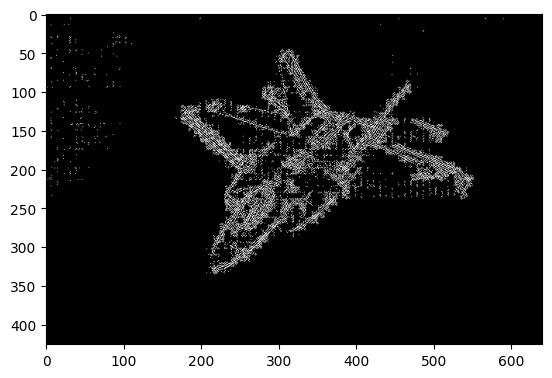

In [186]:
plt.imshow(relu_threshold(texture_img, 118), cmap='gray')

In [192]:
gaussian_kernel = (1/16) * np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
])

alpha = 0.1

blurred = convolve2d(arr_image_bw, gaussian_kernel)
glow_image = normalize_image(arr_image_bw + alpha * blurred)

(np.float64(-0.5), np.float64(639.5), np.float64(425.5), np.float64(-0.5))

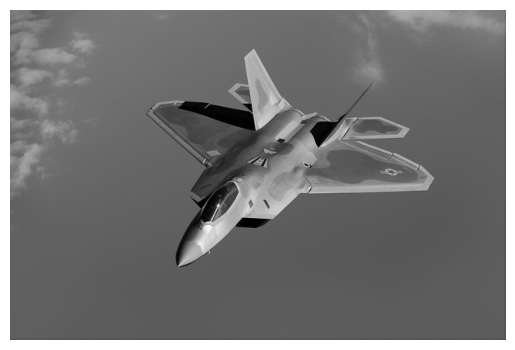

In [193]:
plt.imshow(glow_image, cmap='gray')
plt.axis('off')

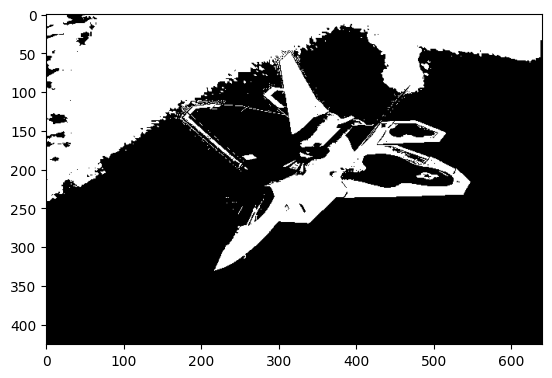

In [194]:
plt.imshow(relu_threshold(glow_image, 108), cmap='gray')

(np.float64(-0.5), np.float64(639.5), np.float64(425.5), np.float64(-0.5))

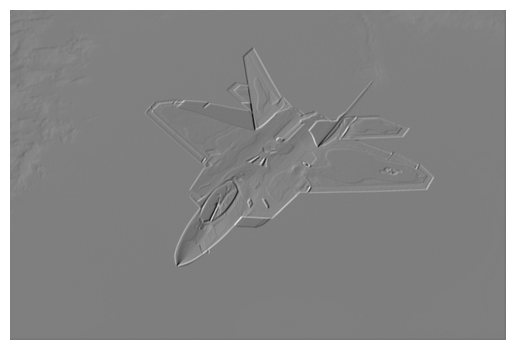

In [197]:
plt.imshow(normalize_image(combo), cmap='gray')
plt.axis('off')

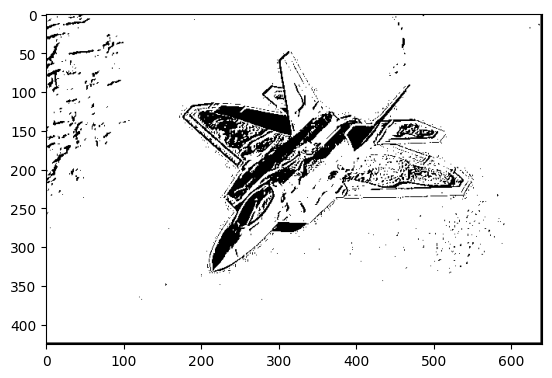

In [201]:
plt.imshow(relu_threshold(combo, 80), cmap='gray')